In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nalger_helper_functions import VectorPolynomial, lagrange_polynomial_vectorized, \
    polynomial_from_roots_vectorized, polynomial_interpolation_vectorized, floater_hormann_rational_interpolation_vectorized

### Vector polynomial:

$$p(t) = v_1 + v_2 t + v_3 t^3 + \dots + v_k t^k$$

where $v_1\in \mathbb{R}^d$, $v_2\in \mathbb{R}^d$, $\dots$, $v_k\in \mathbb{R}^d$ are vectors

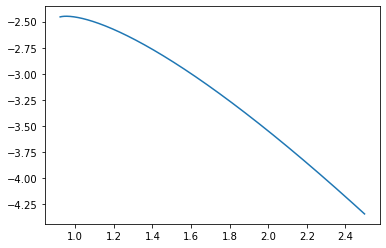

In [2]:
d = 2 # spatial dimension
k = 5 # polynomial order+1

t_start = 0.0
t_stop = 1.0
Nt = 1000 # num timesteps

poly_coeffs = np.random.randn(d, k)
poly = VectorPolynomial(poly_coeffs)

tt = np.linspace(t_start, t_stop, Nt)
pp = poly(tt)

plt.plot(pp[:,0], pp[:,1])

In [3]:
pp_true = np.zeros((Nt, d))
for n in range(Nt):
    t = tt[n]
    pt = 0.0
    for ii in range(k):
        pt += poly_coeffs[:,ii] * (t**ii)
    pp_true[n,:] = pt

err_poly = np.linalg.norm(pp_true - pp)
print('err_poly=', err_poly)

err_poly= 0.0


### Vector polynomial arithmetic

In [4]:
d = 134 # spatial dimension
k1 = 5 # first polynomial order+1
k2 = 7 # second polynomial order+1

p1 = VectorPolynomial(np.random.randn(d, k1))
p2 = VectorPolynomial(np.random.randn(d, k2))

tt = np.random.randn(Nt)

c1 = 3.2
c2 = -1.6

pp_combo = (c1*p1 + c2*p2)(tt)
pp_combo_true = c1*p1(tt) + c2*p2(tt)

err_linear_combo = np.linalg.norm(pp_combo - pp_combo_true) / np.linalg.norm(pp_combo_true)
print('err_linear_combo=', err_linear_combo)

err_linear_combo= 1.16884606792498e-16


In [5]:
pp_mul = (p1 * p2)(tt)
pp_mul_true = p1(tt) * p2(tt)

err_mul = np.linalg.norm(pp_mul - pp_mul_true) / np.linalg.norm(pp_mul_true)
print('err_mul=', err_mul)

err_mul= 3.9185247563271767e-16


### Derivative of vector polynomial

In [6]:
t0 = np.random.randn()
s = 1e-8
t1 = t0 + s

dp1 = p1.derivative()

tangent = dp1(t0)
tangent_diff = (p1(t1) - p1(t0)) / s

err_derivative = np.linalg.norm(tangent - tangent_diff) / np.linalg.norm(tangent_diff)
print('s=', s, ', err_derivative=', err_derivative)

s= 1e-08 , err_derivative= 1.778949017615289e-08


### Arc length of vector polynomial

Find arc length of $p(t)$ from $t=0$ to $t=T$

In [7]:
s=1e-4
T = 1.5

L = p1.arc_length(T)

tt = np.linspace(0.0, T, int(T/s))
pp = p1(tt)
L_diff = np.sum(np.linalg.norm(pp[1:] - pp[:-1], axis=1))

err_arc_length = np.abs(L - L_diff) / np.abs(L_diff)
print('s=', s, ', err_arc_length=', err_arc_length)

s= 0.0001 , err_arc_length= 3.3500861364218e-10


### Arc time of vector polynomial

Find $T$ such that the length of $p(t)$ from $t=0$ to $t=T$ equals $L$


In [8]:
T2 = p1.arc_time(L, display_soln=True, rtol=1e-12)

err_arc_time = np.abs(T - T2) / np.abs(T)
print('err_arc_time=', err_arc_time)

      converged: True
           flag: 'converged'
 function_calls: 29
     iterations: 28
           root: 1.5
err_arc_time= 0.0


### Vector rational function arithmetic


In [9]:
Nt = 1000

d = 134 # spatial dimension
k1 = 5 # first polynomial order+1
k2 = 7 # second polynomial order+1
k3 = 2 # third polynomial order+1

p1 = VectorPolynomial(np.random.randn(d, k1))
p2 = VectorPolynomial(np.random.randn(d, k2))
p3 = VectorPolynomial(np.random.randn(d, k3))

tt = np.random.randn(Nt)

a = 2.1
b = -4.6

rat = (-p1 / (a*p2) + p3) / b

qq = rat(tt)
qq_true = (-p1(tt) / (a*p2(tt)) + p3(tt)) / b

err_rat = np.linalg.norm(qq - qq_true) / np.linalg.norm(qq_true)
print('err_rat=', err_rat)

err_rat= 1.2189580988311482e-12


### Derivative of vector rational function


In [10]:
t0 = np.random.randn()
s = 1e-8
t1 = t0 + s

drat = rat.derivative()

tangent = drat(t0)
tangent_diff = (rat(t1) - rat(t0)) / s

err_rat_derivative = np.linalg.norm(tangent - tangent_diff) / np.linalg.norm(tangent_diff)
print('s=', s, ', err_rat_derivative=', err_rat_derivative)

s= 1e-08 , err_rat_derivative= 1.0897705655557044e-06


### Arc length of vector rational function

Find arc length of $p(t)/q(t)$ from $t=0$ to $t=T$

In [11]:
num = rat.numerator
den = VectorPolynomial(np.abs(rat.denominator.coeffs))
rat = num / den

s=1e-4
T = 1.5

L = rat.arc_length(T)

tt = np.linspace(0.0, T, int(T/s))
rr = rat(tt)
L_diff = np.sum(np.linalg.norm(rr[1:] - rr[:-1], axis=1))

err_rat_arc_length = np.abs(L - L_diff) / np.abs(L_diff)
print('s=', s, ', err_rat_arc_length=', err_rat_arc_length)

s= 0.0001 , err_rat_arc_length= 1.2501643946792013e-08


### Arc time of vector rational function

Find $T$ such that the length of $p(t)/q(t)$ from $t=0$ to $t=T$ equals $L$


In [12]:
T2 = rat.arc_time(L, display_soln=True, rtol=1e-12)

err_rat_arc_time = np.abs(T - T2) / np.abs(T)
print('err_rat_arc_time=', err_rat_arc_time)

      converged: True
           flag: 'converged'
 function_calls: 17
     iterations: 16
           root: 1.5000000000000064
err_rat_arc_time= 4.292862361883938e-15


In [13]:
d=78
num_pts = 9
j=3

t = np.random.randn()

pts = np.random.randn(d, num_pts)

lagrange_poly = lagrange_polynomial_vectorized(pts, j)

q = lagrange_poly(t).reshape(-1)

xj = pts[:,j].reshape((-1,1))
roots = np.bmat([pts[:,:j].reshape((d,-1)), pts[:,j+1:].reshape((d,-1))])

q_true = (np.prod(t - roots, axis=1) / np.prod(xj - roots, axis=1)).reshape(-1)

err_lagrange_vector_polynomial = np.linalg.norm(q-q_true)/np.linalg.norm(q_true)
print('err_lagrange_vector_polynomial=', err_lagrange_vector_polynomial)

roots.shape= (78, 8)
err_lagrange_vector_polynomial= 0.9999928021940496


yy.shape= (9, 2)
xx.shape= (9, 2)
roots.shape= (2, 8)
xx.shape= (9, 2)
roots.shape= (2, 8)
xx.shape= (9, 2)
roots.shape= (2, 8)
xx.shape= (9, 2)
roots.shape= (2, 8)
xx.shape= (9, 2)
roots.shape= (2, 8)
xx.shape= (9, 2)
roots.shape= (2, 8)
xx.shape= (9, 2)
roots.shape= (2, 8)
xx.shape= (9, 2)
roots.shape= (2, 8)
xx.shape= (9, 2)
roots.shape= (2, 8)


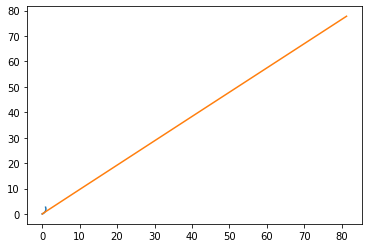

In [25]:
f = lambda x: np.array([np.sin(x), x**1.4]).T

pts = np.random.rand(num_pts)
yy = f(pts)

f_poly = polynomial_interpolation_vectorized(pts, yy)

tt = np.linspace(0., 2., 500)
ff = f(tt)
ff_poly = f_poly(tt)

plt.figure()
plt.plot(ff[:,0], ff[:,1])
plt.plot(ff_poly[:,0], ff_poly[:,1])

In [24]:
# ff - ff_poly
print(f_poly(pts))
print(yy)

[[ 1.86665359e-05  1.54770337e-05]
 [-8.37334623e-06 -5.07986311e-06]
 [ 1.52102972e-06  1.51924755e-06]
 [-1.51683592e-06 -1.50667091e-06]
 [ 9.04234374e-05  1.03001626e-04]
 [ 1.96571155e-04  5.55900988e-05]
 [ 3.61366207e-06  2.34530552e-06]
 [-3.27909054e-05 -3.61151408e-05]
 [-5.20251450e-06 -3.61121634e-06]]
[[0.52345618 0.43401459]
 [0.27403802 0.16625081]
 [0.69843846 0.69762011]
 [0.69337265 0.68872604]
 [0.80998101 0.92265195]
 [0.04248509 0.01201474]
 [0.3190256  0.20705104]
 [0.78321314 0.86261274]
 [0.36915536 0.25624145]]
